In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from __future__ import division

# SAAF VALIDATION

Hand Calculation of SAAF on two-element grid

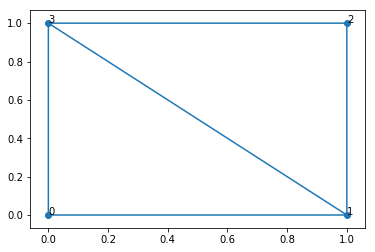

In [2]:
x = np.array([0, 1, 1, 0])
y = np.array([0, 0, 1, 1])
triangles = np.array([[3, 0, 1], [1, 2, 3]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(4):
    plt.annotate(i, (x[i], y[i]))
plt.show()

$\Omega = [.5773503, .5773503], \sigma_t = 1, \frac{1}{\sigma_t} = 1$

In [3]:
omega = np.array([.5773503,-.5773503])
sigt = 1
inv_sigt = 1

Instantiate A matrix (four nodes $\rightarrow$ 4x4)

In [4]:
A = np.zeros((4, 4))

### Loop over the elements:
    for element 0, calculate the basis functions

In [5]:
V = np.array([[1, 0, 1], [1, 0, 0], [1, 1, 0]])
C = np.linalg.inv(V)
C

array([[ 0.,  1.,  0.],
       [ 0., -1.,  1.],
       [ 1., -1.,  0.]])

Basis functions (using global node numbers as indicies)
$\varphi_3 = 0 + 0x + 1y  = y\\
\varphi_0 = 1 + -1x -1y = 1 - (x+y) \\
\varphi_1 = 0 + x +0y = x$

Loop through basis function pairs:

$<\varphi_3, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_3 $ 

In [6]:
grad3 = np.array([0, 1])
area = .5
A[3, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad3)*area

$<\varphi_3, \varphi_3>  \int_D \sigma_t \varphi_3 \varphi_3 =\int_0^1 \int_0^{-x + 1} y^2 dy dx = \frac{1}{12}$

In [7]:
A[3, 3] += 1/12

$<\varphi_3, \varphi_0> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_0 $ 

In [8]:
grad0 = np.array([-1, -1])
A[3, 0] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad0)*area

$<\varphi_3, \varphi_0>  \int_D \sigma_t \varphi_3 \varphi_0 = \int_0^1 \int_0^{-x + 1} y - xy - y^2 dy dx = \frac{1}{24} $

In [9]:
A[3, 0] += 1/24

$<\varphi_3, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_1 $ 

In [10]:
grad1 = np.array([1, 0])
A[3, 1] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad1)*area

$<\varphi_3, \varphi_1>  \int_D \sigma_t \varphi_3 \varphi_0=1 = \int_0^1 \int_0^{-x + 1} xy dy dx = \frac{1}{24} $

In [11]:
A[3, 1] += 1/24

$<\varphi_0, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_0 $ 

In [12]:
A[0, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad0)*area

$<\varphi_0, \varphi_3>  \int_D \sigma_t \varphi_3 \varphi_0 = \int_0^1 \int_0^{-x + 1} y - xy - y^2 dy dx = \frac{1}{24} $

In [13]:
A[0, 3] += 1/24

$<\varphi_0, \varphi_0> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_0 \Omega \cdot \nabla \varphi_0 $ 

In [14]:
A[0, 0] += inv_sigt*np.dot(omega, grad0)*np.dot(omega, grad0)*area

$<\varphi_0, \varphi_0>  \int_D \sigma_t \varphi_0 \varphi_0 = \int_0^1 \int_0^{-x + 1} (1-x-y)^2 dy dx = \frac{1}{12}$

In [15]:
A[0, 0] += 1/12

$<\varphi_0, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_0 \Omega \cdot \nabla \varphi_1 $ 

In [16]:
A[0, 1] += inv_sigt*np.dot(omega, grad0)*np.dot(omega, grad1)*area

$<\varphi_0, \varphi_1>  \int_D \sigma_t \varphi_0 \varphi_1 = \int_0^1 \int_0^{-x + 1} x - x^2 - xy dy dx = \frac{1}{24] $

In [17]:
A[0, 1] += 1/24

$<\varphi_1, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_3 $ 

In [18]:
A[1, 3] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad3)*area

$<\varphi_1, \varphi_3>  \int_D \sigma_t \varphi_3 \varphi_0=1 = \int_0^1 \int_0^{-x + 1} xy dx dy = \frac{1}{24} $

In [19]:
A[1, 3] += 1/24

$<\varphi_1, \varphi_0> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_0 $ 

In [20]:
A[1, 0] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad0)*area

$<\varphi_1, \varphi_0>  \int_D \sigma_t \varphi_0 \varphi_1 = \int_0^1 \int_0^{-x + 1} x - x^2 - xy dy dx = \frac{1}{24} $

In [21]:
A[1, 0] += 1/24

$<\varphi_1, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_1 $ 

In [22]:
A[1, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad1)*area

$<\varphi_1, \varphi_1>  \int_D \sigma_t \varphi_1 \varphi_1 = \int_0^1 \int_0^{-x + 1} x^2 dy dx = \frac{1}{12} $

In [23]:
A[1, 1] += 1/12

    Loop through basis function pairs on boundary:
        All are on the boundary, now figure out which boundary.
$<\varphi_3, \varphi_3>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_3, \varphi_0>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore.

$<\varphi_0, \varphi_3>$ is on the x-min boundary.  $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_0, \varphi_0>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_0, \varphi_1>$ is on the y-min boundary. $\hat{n} = [0, -1]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.


$<\varphi_1, \varphi_3>$ is not on the boundary, so we ignore.

$<\varphi_1, \varphi_0>$ is on the y-min boundary. $\hat{n} = [0, -1]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_1, \varphi_1>$ is on the y-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

Those are all of the basis combinations for the first element, and A remains unchanged.

    for element 1 calculate basis functions:

In [24]:
V = np.array([[1, 1, 0], [1, 1, 1], [1, 0, 1]])
C = np.linalg.inv(V)
C

array([[ 1., -1.,  1.],
       [ 0.,  1., -1.],
       [-1.,  1.,  0.]])

Basis functions (using global node numbers as indicies)
$\varphi_1 = 1 + 0x - 1y  = 1 - y\\
\varphi_2 = -1 + 1x + 1y = x + y - 1 \\
\varphi_3 = 1 - x +0y = 1 - x$

Loop through basis function pairs:

$<\varphi_1, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_1 $ 

In [25]:
grad1 = np.array([0, -1])
A[1, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad1)*area

$<\varphi_1, \varphi_1>  \int_D \sigma_t \varphi_1 \varphi_1 = \int_0^1 \int_{-x + 1}^1 1 -2y +y^2 dy dx = \frac{1}{12} $

In [26]:
A[1, 1] += 1/12

$<\varphi_1, \varphi_2> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_2 $ 

In [27]:
grad2 = np.array([1, 1])
A[1, 2] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad1)*area

$<\varphi_1, \varphi_2>  \int_D \sigma_t \varphi_1 \varphi_2 = \int_0^1 \int_{-x + 1}^1 (x + y - 1-xy - y^2 + y)  dy dx = \frac{1}{24}$

In [28]:
A[1, 2] += 1/24

$<\varphi_1, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_1 \Omega \cdot \nabla \varphi_3 $ 

In [29]:
grad3 = np.array([-1, 0])
A[1, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad1)*area

$<\varphi_1, \varphi_3>  \int_D \sigma_t \varphi_1 \varphi_3 = \int_0^1 \int_{-x + 1}^1 (1 - x)(1-y)  dy dx =  \frac{1}{24}$

In [30]:
A[1, 3] += 1/24

$<\varphi_2, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_2 \Omega \cdot \nabla \varphi_1 $ 

In [31]:
A[2, 1] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad1)*area

$<\varphi_2, \varphi_1>  \int_D \sigma_t \varphi_1 \varphi_2 = \int_0^1 \int_{-x+1}^1 (x + y - 1-xy - y^2 + y)  dy dx = \frac{1}{24} $

In [32]:
A[2, 1] += 1/24

$<\varphi_2, \varphi_2> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_2 \Omega \cdot \nabla \varphi_2 $ 

In [33]:
A[2, 2] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad2)*area

$<\varphi_2, \varphi_2>  \int_D \sigma_t \varphi_2 \varphi_2 = \int_0^1 \int_{-x+1}^1 (x + y - 1)^2  dy dx = \frac{1}{12}$

In [34]:
A[2, 2] += 1/12

$<\varphi_2, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_2 \Omega \cdot \nabla \varphi_3 $ 

In [35]:
A[2, 3] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad3)*area

$<\varphi_2, \varphi_3>  \int_D \sigma_t \varphi_2 \varphi_3 = \int_0^1 \int_{-x+1}^1 (x + y - 1 - x^2 -xy + x)  dy dx = \frac{1}{24} $

In [36]:
A[2, 3] += 1/24

$<\varphi_3, \varphi_1> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_1 $ 

In [37]:
A[3, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad3)*area

$<\varphi_3, \varphi_1>  \int_D \sigma_t \varphi_1 \varphi_3 = \int_0^1 \int_{-x+1}^1 (1 - x)(1-y)   dy dx = \frac{1}{24} $

In [38]:
A[3, 1] += 1/24

$<\varphi_3, \varphi_2> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_2 $ 

In [39]:
A[3, 2] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad2)*area

$<\varphi_3, \varphi_2>  \int_D \sigma_t \varphi_2 \varphi_3 = \int_0^1 \int_{-x+1}^1 (x + y - 1 - x^2 -xy + x)  dy dx = \frac{1}{24} $

In [40]:
A[3, 2] += 1/24 

$<\varphi_3, \varphi_3> \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_3 \Omega \cdot \nabla \varphi_3 $ 

In [41]:
A[3, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad3)*area

$<\varphi_3, \varphi_3>  \int_D \sigma_t \varphi_3 \varphi_3 = \int_0^1 \int_{-x+1}^1 (1 - 2x + x^2)  dy dx =  \frac{1}{12}$

In [42]:
A[3, 3] += 1/12

In [43]:
A

array([[ 0.08333333,  0.04166667,  0.        ,  0.04166667],
       [ 0.04166667,  0.50000004,  0.04166667, -0.25000004],
       [ 0.        ,  0.04166667,  0.08333333,  0.04166667],
       [ 0.04166667, -0.25000004,  0.04166667,  0.50000004]])

    Loop through basis function pairs:
        All are on the boundary, now figure out which boundary.
$<\varphi_1, \varphi_1>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[1, 1] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_1 = \hat{n} \cdot \Omega \int_0^1 (1-y)^2 = \int_0^1 1 -2y +y^2 = \hat{n} \cdot \Omega [y - y^2 + \frac{1}{3}y^3]_0^1 = .5773503*\frac{1}{3}$



In [ ]:
A[1, 1] += omega[0]*(1/3)

$<\varphi_1, \varphi_2>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[1, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n} \cdot \Omega \int_0^1 (1-y)(x + y -1) = .5773503(-\frac{1}{3} + \frac{1}{2})$

In [ ]:
A[1, 2] += omega[0]*(1/2 - 1/3)

$<\varphi_1, \varphi_3>$ is not on the boundary, so we ignore

$<\varphi_2, \varphi_1>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[2, 1] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n} \cdot \Omega \int_0^1 (1-y)(x + y -1) = .5773503(-\frac{1}{3} + \frac{1}{2})$

In [ ]:
A[2, 1] += omega[0]*(1/2 - 1/3)

$<\varphi_2, \varphi_2>$ is on both boundaries we do each one at a time.
For the ymax boundary, $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$ so $A[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(x+y-1) = \hat{n} \cdot \Omega \int_0^1(x+1-1)(x+1-1) = \hat{n} \cdot \Omega \int_0^1x^2 = \hat{n} \cdot \Omega [\frac{1}{3}x^3]_0^1 = .5773503(\frac{1}{3})  $


In [ ]:
A[2, 2] += omega[1]*(1/3)

For the xmax boundary,$ \hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = .5773503(\frac{1}{3})$

In [ ]:
A[2, 2] += omega[0]*(1/3)

$<\varphi_2, \varphi_3>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[2, 3] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(1-x) = \hat{n} \cdot \Omega [\frac{1}{2} - \frac{1}{3}] $

In [ ]:
A[2, 3] += omega[1]*(1/2 - 1/3)

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore

$<\varphi_3, \varphi_2>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[3, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(1-x) = \hat{n} \cdot \Omega [\frac{1}{2} - \frac{1}{3}] $

In [ ]:
A[3, 2] += omega[1]*(1/2 - 1/3)

$<\varphi_3, \varphi_3>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[3, 3] += \int_0^1 \hat{n}\cdot \Omega \varphi_3 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(1-x)(1-x) =\hat{n} \cdot \Omega \int_0^1 1 - 2x + x^2 = \hat{n} \cdot \Omega [x - x^2 + \frac{1}{3}x^3]_0^1 = .5773503(\frac{1}{3}) $

In [ ]:
A[3, 3] += omega[0]*(1/3)

Those are all the elements, so the final A is

In [ ]:
print(A)

Which checks out with the code's LHS matrix for this problem (input name std.1)

In [44]:
def cell_contribution(A, omega, inv_sigt):
    #Element 0
    
    grad3 = np.array([0, 1])
    grad0 = np.array([-1, -1])
    grad1 = np.array([1, 0])
    area = .5
    A[3, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad3)*area
    A[3, 3] += 1/12
    A[3, 0] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad0)*area
    A[3, 0] += 1/24
    A[3, 1] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad1)*area
    A[3, 1] += 1/24
    A[0, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad0)*area
    A[0, 3] += 1/24
    A[0, 0] += inv_sigt*np.dot(omega, grad0)*np.dot(omega, grad0)*area
    A[0, 0] += 1/12
    A[0, 1] += inv_sigt*np.dot(omega, grad0)*np.dot(omega, grad1)*area
    A[0, 1] += 1/24
    A[1, 3] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad3)*area
    A[1, 3] += 1/24
    A[1, 0] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad0)*area
    A[1, 0] += 1/24
    A[1, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad1)*area
    A[1, 1] += 1/12

    #Element 1
    grad1 = np.array([0, -1])
    grad2 = np.array([1, 1])
    grad3 = np.array([-1, 0])
    A[1, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad1)*area
    A[1, 1] += 1/12
    A[1, 2] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad1)*area
    A[1, 2] += 1/24
    A[1, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad1)*area
    A[1, 3] += 1/24
    A[2, 1] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad1)*area
    A[2, 1] += 1/24
    A[2, 2] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad2)*area
    A[2, 2] += 1/12
    A[2, 3] += inv_sigt*np.dot(omega, grad2)*np.dot(omega, grad3)*area
    A[2, 3] += 1/24
    A[3, 1] += inv_sigt*np.dot(omega, grad1)*np.dot(omega, grad3)*area
    A[3, 1] += 1/24
    A[3, 2] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad2)*area
    A[3, 2] += 1/24 
    A[3, 3] += inv_sigt*np.dot(omega, grad3)*np.dot(omega, grad3)*area
    A[3, 3] += 1/12
    return A

In [48]:
def boundary_top(A, omega):
    A[3, 3] += np.abs(omega[1])*(1/3)
    A[3, 2] += np.abs(omega[1])*(1/6)
    A[2, 3] += np.abs(omega[1])*(1/6)
    A[2, 2] += np.abs(omega[1])*(1/3)
    return A

In [49]:
def boundary_right(A, omega):
    A[2, 2] += np.abs(omega[0])*(1/3)
    A[2, 1] += np.abs(omega[0])*(1/6)
    A[1, 2] += np.abs(omega[0])*(1/6)
    A[1, 1] += np.abs(omega[0])*(1/3)
    return A

In [50]:
def boundary_left(A, omega):
    A[0, 0] += np.abs(omega[0])*(1/3)
    A[3, 0] += np.abs(omega[0])*(1/6)
    A[0, 3] += np.abs(omega[0])*(1/6)
    A[3, 3] += np.abs(omega[0])*(1/3)
    return A

In [51]:
def boundary_bottom(A, omega):
    A[0, 0] += np.abs(omega[1])*(1/3)
    A[1, 0] += np.abs(omega[1])*(1/6)
    A[0, 1] += np.abs(omega[1])*(1/6)
    A[1, 1] += np.abs(omega[1])*(1/3)
    return A

In [52]:
omega = np.array([.5773503,.5773503])
sigt = 1
inv_sigt = 1
A = np.zeros((4, 4))
A = cell_contribution(A, omega, inv_sigt)
A = boundary_right(A, omega)
A = boundary_top(A, omega)
A

array([[ 0.75000007, -0.2916667 ,  0.        , -0.2916667 ],
       [-0.2916667 ,  0.69245014, -0.19544165,  0.4166667 ],
       [ 0.        , -0.19544165,  1.13490027, -0.19544165],
       [-0.2916667 ,  0.4166667 , -0.19544165,  0.69245014]])

In [59]:
omega = np.array([-.5773503,.5773503])
sigt = 1
inv_sigt = 1
B = np.zeros((4, 4))
#B = cell_contribution(B, omega, inv_sigt)
B = boundary_left(B, omega)
B = boundary_top(B, omega)
B

array([[ 0.1924501 ,  0.        ,  0.        ,  0.09622505],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.1924501 ,  0.09622505],
       [ 0.09622505,  0.        ,  0.09622505,  0.3849002 ]])

In [57]:
omega = np.array([.5773503,-.5773503])
sigt = 1
inv_sigt = 1
C = np.zeros((4, 4))
C = cell_contribution(C, omega, inv_sigt)
C = boundary_right(C, omega)
C = boundary_bottom(C, omega)
C

array([[ 0.27578343,  0.13789172,  0.        ,  0.04166667],
       [ 0.13789172,  0.88490024,  0.13789172, -0.25000004],
       [ 0.        ,  0.13789172,  0.27578343,  0.04166667],
       [ 0.04166667, -0.25000004,  0.04166667,  0.50000004]])

In [55]:
omega = np.array([-.5773503,-.5773503])
sigt = 1
inv_sigt = 1
A = np.zeros((4, 4))
A = cell_contribution(A, omega, inv_sigt)
A = boundary_left(A, omega)
A = boundary_bottom(A, omega)
A

array([[ 1.13490027, -0.19544165,  0.        , -0.19544165],
       [-0.19544165,  0.69245014, -0.2916667 ,  0.4166667 ],
       [ 0.        , -0.2916667 ,  0.75000007, -0.2916667 ],
       [-0.19544165,  0.4166667 , -0.2916667 ,  0.69245014]])

## STANDARD GRID RHS

We give the RHS as follows:

$\int_D \frac{q}{4 \pi}\varphi_i dy dx + \int_D \frac{q}{4 \pi \sigma_t} \Omega \cdot \nabla \varphi_i dy dx$

with $q=\sigma_t=1$
Loop over elements. Recall for element 0 we have the following basis functions:

$\varphi_3  = y\\
\varphi_0 =  1 - (x+y) \\
\varphi_1  = x$

$<\varphi_3>: \int_0^1 \int_0^{-x + 1} \frac{y}{4\pi} dy dx = \frac{1}{24\pi}$  
$<\varphi_3>: \int_0^1 \int_0^{-x + 1} \frac{q}{4 \pi \sigma_t} \Omega \cdot \nabla \varphi_3 dy dx = area\frac{1}{4\pi} \Omega \cdot \nabla \varphi_3$  
$<\varphi_0>: \int_0^1 \int_0^{-x + 1} \frac{(1 - x -y}{4\pi} dy
dx\frac{1}{24\pi}$  
$<\varphi_0>: \int_0^1 \int_0^{-x + 1} \frac{q}{4 \pi \sigma_t} \Omega \cdot \nabla \varphi_0 dy dx = area\frac{1}{4\pi} \Omega \cdot \nabla \varphi_0$  
$<\varphi_1>: \int_0^1 \int_0^{-x + 1} \frac{(x}{4\pi} dy dx\frac{1}{24\pi}$  
$<\varphi_1>: \int_0^1 \int_0^{-x + 1} \frac{q}{4 \pi \sigma_t} \Omega \cdot \nabla \varphi_1 dy dx = area\frac{1}{4\pi} \Omega \cdot \nabla \varphi_1$  

Recall the basis functions for element 1 are:

$\varphi_1 = 1 - y\\
\varphi_2 =  x + y - 1 \\
\varphi_3 = 1 - x$

In [63]:
def rhs(b, omega, sigt, q):
    # 4 nodes, 4 entries
    b = np.zeros(4)
    
    area = .5
    # Element 0
    grad3 = np.array([0, 1])
    grad0 = np.array([-1, -1])
    grad1 = np.array([1, 0])
    b[3] += 1/(24*np.pi)
    b[3] += area/(4*np.pi)*np.dot(omega, grad3)
    b[0] += 1/(24*np.pi)
    b[0] += area/(4*np.pi)*np.dot(omega, grad0)
    b[1] += 1/(24*np.pi)
    b[1] += area/(4*np.pi)*np.dot(omega, grad1)
    # Element 1
    grad1 = np.array([0, -1])
    grad2 = np.array([1, 1])
    grad3 = np.array([-1, 0])
    b[1] += 1/(24*np.pi)
    b[1] += area/(4*np.pi)*np.dot(omega, grad1)
    b[2] += 1/(24*np.pi)
    b[2] += area/(4*np.pi)*np.dot(omega, grad2)
    b[3] += 1/(24*np.pi)
    b[3] += area/(4*np.pi)*np.dot(omega, grad3)
    
    return b
    

In [64]:
omega = np.array([.5773503,.5773503])
sigt = 1
q = 1
b = np.zeros(4)
b = rhs(b, omega, sigt, q)
b

array([-0.03268117,  0.02652582,  0.05920699,  0.02652582])

In [65]:
omega = np.array([-.5773503,.5773503])
sigt = 1
q = 1
b = np.zeros(4)
b = rhs(b, omega, sigt, q)
b

array([ 0.01326291, -0.01941825,  0.01326291,  0.0724699 ])

In [66]:
omega = np.array([.5773503,-.5773503])
sigt = 1
q = 1
b = np.zeros(4)
b = rhs(b, omega, sigt, q)
b

array([ 0.01326291,  0.0724699 ,  0.01326291, -0.01941825])

In [67]:
omega = np.array([-.5773503,-.5773503])
sigt = 1
q = 1
b = np.zeros(4)
b = rhs(b, omega, sigt, q)
b

array([ 0.05920699,  0.02652582, -0.03268117,  0.02652582])

## Non-Standard Grid

In [ ]:
x = np.array([0, 1, 1, 0])
y = np.array([0, 0, 2, 2])
triangles = np.array([[3, 0, 1], [1, 2, 3]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(4):
    plt.annotate(i, (x[i], y[i]))
plt.show()

Same problem as before, new geometry. 
$\Omega = [.5773503, .5773503], \sigma_t = 1, \frac{1}{\sigma_t} = 1$

Instantiate A matrix (four nodes $\rightarrow$ 4x4)

In [ ]:
B = np.zeros((4, 4))

### Loop over the elements:

For all of element 0 $\hat{n}\cdot \Omega < 0$, (see above) so move on to element 1.

Calculate Basis Functions.

In [ ]:
V = np.array([[1, 1, 0], [1, 1, 2], [1, 0, 2]])
C = np.linalg.inv(V)
C

Basis functions (using global node numbers as indicies)
$\varphi_1 = 1 + 0x - .5y  = 1 - .5y\\
\varphi_2 = -1 + 1x + .5y = x + .5y - 1 \\
\varphi_3 = 1 - x +0y = 1 - x$

$B[1, 1] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_1 = \hat{n} \cdot \Omega \int_0^2 (1-\frac{1}{2}y)^2 = \int_0^2 1 -y +\frac{1}{4}y^2 = \hat{n} \cdot \Omega [y - \frac{1}{2}y^2 + \frac{1}{12}y^3]_0^2 = .5773503*[2 - \frac{4}{2} + \frac{8}{12}] = .5773503*[2 - 2 + \frac{2}{3}]$

In [ ]:
B[1, 1] = omega[0]*(2/3)
print(B[1, 1])

$B[1, 2] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(x + \frac{1}{2}y - 1) $ On the xmax boundary $x=1,  \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(\frac{1}{2}y) = \hat{n}\cdot \Omega \int_0^2 \frac{1}{2}y - \frac{1}{4}y^2 =\hat{n}\cdot \Omega [\frac{1}{4}y^2 - \frac{1}{12}y^3]0^2 = \hat{n}\cdot \Omega[ \frac{4}{4} - \frac{8}{12}] = .5773503∗[1 - \frac{2}{3}]$

In [ ]:
B[1, 2] += omega[0]*(1 - (2/3))

$<\varphi_1, \varphi_3>$ is not on the boundary.

$<\varphi_2, \varphi_1>$ is on the xmax boundary and $x=1$
$B[2, 1] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(x + \frac{1}{2}y - 1) $ On the xmax boundary $x=1,  \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(\frac{1}{2}y) = \hat{n}\cdot \Omega \int_0^2 \frac{1}{2}y - \frac{1}{4}y^2 =\hat{n}\cdot \Omega [\frac{1}{4}y^2 - \frac{1}{12}y^3]0^2 = \hat{n}\cdot \Omega[ \frac{4}{4} - \frac{8}{12}] = .5773503∗[1 - \frac{2}{3}]$

In [ ]:
B[2, 1] += omega[0]*(1 - (2/3))

$<\varphi_2, \varphi_2>$ is along both max boundaries so we split up into two calculations. First the xmax boundary where $x=1$:  

$B[2, 2] += \int_0^2 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (x + \frac{1}{2}y - 1)^2 = \hat{n}\cdot \Omega \int_0^2 (\frac{1}{2}y)^2 = \hat{n}\cdot \Omega \int_0^2 \frac{1}{4}y^2 = \hat{n}\cdot \Omega [\frac{1}{12}y^3]_0^2 = .5773503*\frac{2}{3}$

In [ ]:
B[2, 2] += omega[0]*(2/3)

Now incorporate the integral along the ymax boundary where $y=2$

$B[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n}\cdot \Omega \int_0^1 (x + \frac{1}{2}y - 1)^2 = \hat{n}\cdot \Omega \int_0^1 (x )^2 = \hat{n}\cdot \Omega \frac{1}{3}x^3 =.5773503*\frac{1}{3}$ 

In [ ]:
B[2, 2] += omega[0]*(1/3)

$<\varphi_2, \varphi_3>$ is on the ymax boundary where $y=2$

$B[2, 3] += \hat{n}\cdot \Omega \int_0^1(x + \frac{1}{2}y - 1)(1 - x) dx =\hat{n}\cdot \Omega \int_0^1(x)(1-x) dx =  \hat{n}\cdot \Omega \int_0^1 x - x^2 = \hat{n}\cdot \Omega [\frac{1}{2}x^2 - \frac{1}{3}x^3]_0^1 = .5773503∗[\frac{1}{2} - \frac{1}{3}]$

In [ ]:
B[2, 3] += .5773503*((1/2) - (1/3))

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore.

$B[3, 2] += B[2, 3] = .5773503∗[\frac{1}{2}−\frac{1}{3}]$

In [ ]:
B[3, 2] += .5773503*((1/2) - (1/3))

$<\varphi_3, \varphi_3>$ is on the ymax boundary where $y=2$
$B[3, 3] += \hat{n}\cdot \Omega \int_0^1 (1-x)^2 = \hat{n}\cdot \Omega \int_0^1 1 -2x +x^2 = \hat{n}\cdot \Omega [x - x^2 + \frac{1}{3}x^3]_0^1 =   .5773503* \frac{1}{3}$

In [ ]:
B[3, 3] += omega[0]*(1/3)

In [ ]:
B

In [ ]:
omega[0]*(1/3)